In [2]:

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torchvision
import torch
import clip
import pandas as pd 
import numpy as np
import json
import h5py
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, matthews_corrcoef
os.chdir("/s/project/gene2bird/groupA")


In [28]:

with open("/s/project/gene2bird/groupA/complete_final.json", "r") as file:
    gene_dat = json.load(file)
    for spec in gene_dat:
        
        #remove the species handle frome the gene name
        
        gene_dat[spec] = [g.split(",")[0] for g in gene_dat[spec]]
        
species = list(gene_dat.keys())
gen = []

#concatenate all genes into one long unique list

for gene in gene_dat:
    gen.extend(gene_dat[gene])
gen = np.unique(gen)


In [29]:
gen_df = pd.DataFrame(columns = species)

#fill up dataframe with species as columns, genes as rows and the presence/absence of a gene as value
#print statement just to see progress because im impatient 

n = len(gen)
for i, g in enumerate(gen):
    if i % 2000 == 0:
        print(str(i) + " out of " + str(n))
    row = [g in gene_dat[s] for s in species]
    gen_df.loc[i] = row

gen_df.index = gen



0 out of 17060
2000 out of 17060
4000 out of 17060
6000 out of 17060
8000 out of 17060
10000 out of 17060
12000 out of 17060
14000 out of 17060
16000 out of 17060


In [2]:
#read in the gen_df instead of running again
gen_df = pd.read_csv('/s/project/gene2bird/groupA/gene_by_species.csv', index_col = 0)


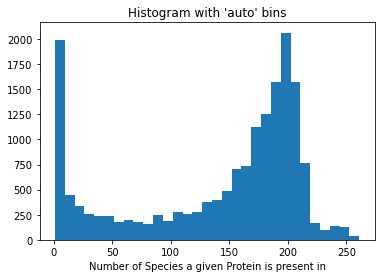

In [30]:
import matplotlib.pyplot as plt

_ = plt.hist(gene_df.sum(axis= 1), bins='auto')
plt.title("Histogram with 'auto' bins")
plt.xlabel("Number of Species a given Protein is present in")
plt.show()

<AxesSubplot:ylabel='Frequency'>

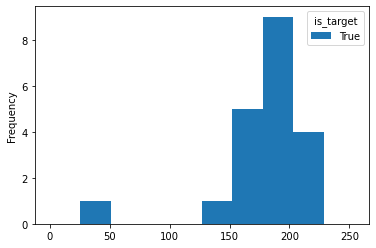

In [40]:
targets = [k in is_in for k in list(gene_df.index)]
sums = gene_df.sum(axis= 1)
df = pd.DataFrame(data = {"is_target":targets, "occurence":sums})
df.pivot(columns='is_target', values='occurence').plot.hist()


In [5]:
import pandas as pd 

meta_df = pd.read_csv("../image_data/METADATA.csv")
meta_df

,filenam,scinam,subspecies,family,bownam,md5,color_morph,breeding_status,descriptor,nominate,sex
0,Lesser_Short-toed_Lark_(apetzii)_Alaudala_rufe...,Alaudala rufescens,apetzii,Alaudidae,lstlar3,4b75cd686e1f2f2b24c1f67e16bf53a51,NaN,NaN,perched,no,male
1,Lesser_Short-toed_Lark_(heinei)_Alaudala_rufes...,Alaudala rufescens,heinei,Alaudidae,lstlar3,73e4b3f1459175d80f92666a319e2bd31,NaN,NaN,perched,no,male
2,Lesser_Short-toed_Lark_(rufescens)_Alaudala_ru...,Alaudala rufescens,rufescens,Alaudidae,lstlar3,5020d0e874e6d60a0cf22f29843950ce1,NaN,NaN,perched,yes,male
3,Sultan's_Cuckoo-Dove_(albiceps)_Macropygia_dor...,Macropygia doreya,albiceps,Columbidae,sulcud1,59fc96bd99917f452cada9f073d45cce1,NaN,NaN,perched,no,male
4,Sultan's_Cuckoo-Dove_(doreya)_Macropygia_dorey...,Macropygia doreya,doreya,Columbidae,sulcud1,e7681babc3c265180ca276e4205b33e41,NaN,NaN,perched,yes,male
...,...,...,...,...,...,...,...,...,...,...,...
31237,Oriental_Greenfinch_(sinica)_Chloris_sinica_si...,Chloris sinica,sinica,Fringillidae,origre,9faaa3c8d2a79a56672716350bd6a0ac1,NaN,NaN,perched,yes,female
31238,Vietnamese_Greenfinch_Chloris_monguilloti_Fema...,Chloris monguilloti,monguilloti,Fringillidae,viegre2,bf1abdd48b6a7a6bc0398b7385c0a7901,NaN,NaN,perched,yes,female
31239,Black-headed_Greenfinch_(ambigua)_Chloris_ambi...,Chloris ambigua,ambigua,Fringillidae,bkhgre1,072e1c690004aadf3a64bb74a69778eb1,NaN,NaN,perched,yes,female
31240,Red_Crossbill_(Da_Lat)_Loxia_curvirostra_merid...,Loxia curvirostra,meridionalis,Fringillidae,redcro,c653f65d784fa34e928634f8128571da1,NaN,NaN,perched,no,female


In [6]:


def create_dataset(target):
    embeddings = pd.read_csv('/s/project/gene2bird/groupA/annotated_embeddings.csv', index_col = 0)
    gene_df = pd.read_csv('/s/project/gene2bird/groupA/gene_by_species.csv', index_col = 0)
    order = list(embeddings.index)
    gene_df = gene_df[gene_df.columns.intersection(order)]
    gene_df = gene_df[order]
    response = [np.array(gene_df.loc[[dis]])[0] for dis in target]
    return response



    

In [52]:
goi = ["ATP7A", "JMJD6", "SEMA6A", "SFRP1", "IVNS1ABP", "GPM6B", "TCF7", "ITGB1", "ATP7B", "FABP7", "LZTS1", "NDP", "CORIN", "ASIP", "SCARB1", "WNT5A", "SLC16A6", "MAPKAPK3", "PRKG2", "SLC19A2", "FRZB", "PRKCA", "CRHBP", "WNT7B", "HPGDS", "NDP", "TYRP1", "OCA2", "SLC45A2", "RASGRF1", "RAB38", "MLANA", "SLC24A4", "TYR", "CLCN7", "MC1R", "ATP6V1B2", "NR4A3", "CASP3", "FRZB"]
is_in = []
for g in goi:
    for gen in gene_df.index:
        if g in gen:
            is_in.append(gen)
            break
    
    

In [3]:
embeddings = pd.read_csv('/s/project/gene2bird/groupA/annotated_embeddings.csv', index_col = 0)
gene_df = pd.read_csv('/s/project/gene2bird/groupA/gene_by_species.csv', index_col = 0)
order = list(embeddings.index)
gene_df = gene_df[gene_df.columns.intersection(order)]
gene_df = gene_df[order]


In [14]:
color = create_dataset(["MAL protein"])[0]
embeddings = pd.read_csv('/s/project/gene2bird/groupA/annotated_embeddings.csv', index_col = 0)


In [10]:
import umap.umap_ as umap

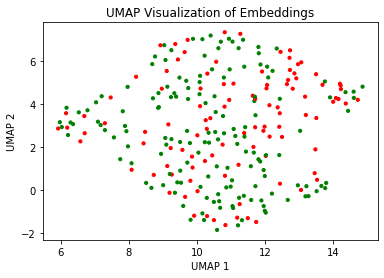

In [36]:
# Run UMAP to reduce dimensionality
umap_emb = umap.UMAP(n_neighbors=15, min_dist=0.5).fit_transform(embeddings)

# Plot the UMAP visualization
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], s=10, c = ["green" if c == 1 else "red" for c in color],)
plt.title('UMAP Visualization of Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.show()

In [63]:
prot_of_int = []
for index, row in gene_df.iterrows():
    if sum(row) > 150 and sum(row) < 225:
        prot_of_int.append(index)


In [64]:
y_list = create_dataset(prot_of_int)
x = pd.read_csv('/s/project/gene2bird/groupA/annotated_embeddings.csv', index_col = 0)

In [68]:
clf = svm.SVC()
mcc = []
for i, y in enumerate(y_list): 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mcc.append(matthews_corrcoef(y_test, y_pred))
mcc_df = pd.DataFrame(data = {"Protein":prot_of_int, "MCC_Score":mcc})

In [75]:
mcc_df.sort_values(by = ["MCC_Score"], ascending=False)

,Protein,MCC_Score
4732,MAL protein,0.342467
259,AGO2 protein,0.277234
1481,CHAC1 glutamylcyclotransferase,0.231678
8289,SYT4 protein,0.204817
5109,MRAP2 protein,0.201987
...,...,...
7777,SIGIR protein,-0.168298
9566,ZBBX protein,-0.179298
3311,GMDS dehydratase,-0.183165
1821,CPN2 Carboxypeptidase,-0.197430


In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
features = pca.fit_transform(embeddings)

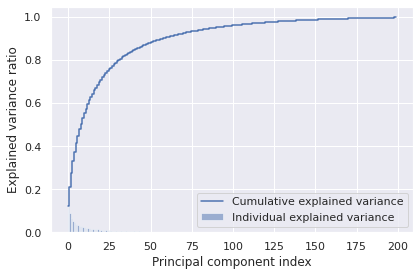

In [62]:
X_train_pca = pca.fit_transform(embeddings)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()